In [1]:
R.version

               _                           
platform       x86_64-conda-linux-gnu      
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          0.5                         
year           2021                        
month          03                          
day            31                          
svn rev        80133                       
language       R                           
version.string R version 4.0.5 (2021-03-31)
nickname       Shake and Throw             

In [14]:
library("RColorBrewer")

In [15]:
library("phyloseq")

In [16]:
library("ggplot2")

In [17]:
library("vegan")

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7



In [18]:
library("dplyr")

In [19]:
library("ape")

In [20]:
library("png")

Load the OTU table (OTU by sample abundance)

In [21]:
otu_table <- read.table("trnL_cluster_OTU_table_f1_basics2_cut2phyloseq2.tab", header=TRUE, row.names=1)

Convert table to matrix

In [22]:
otu_table <- as.matrix(otu_table)

Load the taxa assignments table (OTU - lineage - taxa by best hit)

In [25]:
taxonomy <- read.table("target95_trnL_OTU_tax_assignments.txt", header=TRUE, row.names = 1)

Convert table to matrix

In [26]:
taxonomy <- as.matrix(taxonomy)

<p>Load the <strong>metadata</strong>, a tab delimited text file with the SampleID (mandatory) in the first column and following columns describing important features from your data. The format must be like this:</p>
<p><strong>SampleID</strong><span style="white-space:pre;"><strong>&nbsp; &nbsp; </strong></span><strong>SampleName</strong><span style="white-space:pre;"><strong>&nbsp; &nbsp; </strong></span><strong>Replicate </strong><strong>Season</strong><span style="white-space:pre;"><strong>&nbsp; &nbsp; </strong></span></p>
<p>Amazon_W_I<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span>Amazon_W_I<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span>Amazon_W<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span>Winter &nbsp;</p>
<p>Amazon_W_II<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span>Amazon_W_II<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span>Amazon_W<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span>Winter<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span></p>
<p>Amazon_S_I<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span>Amazon_S_I<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span>Amazon_S<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span>Summer<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span></p>
<p>Amazon_S_II<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span>Amazon_S_II<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span>Amazon_S<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span>Summer</p>

In [27]:
metadata <- read.table("trnL_sub_metadata.txt", header=TRUE, row.names = 1)

In [28]:
meta <- as.matrix(metadata)

Tables conversion to variables according to Phyloseq functions:

In [29]:
OTU <- otu_table(otu_table, taxa_are_rows = TRUE)

In [30]:
TAX <- tax_table(taxonomy)

In [31]:
META <- sample_data(metadata)

Check if the taxa_names and sample_names are the same between tables:

Combine the new three data variables into a Phyloseq object, allowing the concomitant quantitative and taxonomical data exploration, along with to any descriptive variable present in metadata file.

In [32]:
merged <- phyloseq(OTU, TAX, META)

Create a random phylogenetic tree

In [33]:
random_tree = rtree(ntaxa(merged), rooted=TRUE, tip.label=taxa_names(merged))

Create the final phyloseq object merging all 4 main components, OTU, TAX, META and random_tree

In [34]:
data <- phyloseq(OTU, TAX, META, random_tree)

Check your phyloseq object:

In [35]:
data

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 150 taxa and 34 samples ]
sample_data() Sample Data:       [ 34 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 150 taxa by 9 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 150 tips and 149 internal nodes ]

In [36]:
head(sample_names(data))

[1] "Angelicaesinensis_a"   "Angelicaesinensis_b"   "Carthamustinctorius_a"
[4] "Carthamustinctorius_b" "Citrusaurantium_a"     "Citrusaurantium_b"

In [37]:
ntaxa(data)

[1] 150

In [38]:
nsamples(data)

[1] 34

In [39]:
sum(sample_sums(data))

[1] 472695

In [40]:
rank_names(data)

[1] "Kingdom"       "Phylum"        "Class"         "Ord"          
[5] "Family"        "Genus"         "Species"       "SIM"          
[9] "OTU_abundance"

In [41]:
taxa_names(data)[1:10]

[1] "0378324ee449829570d626f14106b35147b23636"
 [2] "ade012fca4432459ed1988cd5897c753ac8f9f4a"
 [3] "c5d3f612fb1bcbc940dec631f3f4af6b18d873cd"
 [4] "4181cd479dcace078c966c0a3387f3f3bf3df835"
 [5] "7bb64ef2725b146c74add357867e20995ecd52ee"
 [6] "a52fe45a80d72d01327007ed786b56698fe32808"
 [7] "53f1a868d655675aee7efe3fb847216dd3e044ce"
 [8] "ec4a6ae94083297528aa5d4203e32a04fd9f4f99"
 [9] "8a20b4ae14920cc80e33ad9b4dd20099a109c7c3"
[10] "967e951648145482fcc47f85b2a3530bec26d552"

In [42]:
sample_variables(data)

[1] "SampleName" "Replicate"  "Experiment" "Exp_fam"    "Exp_genus"

In [43]:
tax_table(data)[1:5, 1:9]

,Kingdom,Phylum,Class,Ord,Family,Genus,Species,SIM,OTU_abundance
0378324ee449829570d626f14106b35147b23636,Eukaryota,Streptophyta,Magnoliopsida,Santalales,Loranthaceae,Taxillus,theifer,97.619,45
ade012fca4432459ed1988cd5897c753ac8f9f4a,Eukaryota,Streptophyta,Magnoliopsida,Laurales,Lauraceae,Cinnamomum,verum,100.000,10
c5d3f612fb1bcbc940dec631f3f4af6b18d873cd,Eukaryota,Streptophyta,Magnoliopsida,Nymphaeales,Nymphaeaceae,Nymphaea,lotus,96.296,8
4181cd479dcace078c966c0a3387f3f3bf3df835,Eukaryota,Streptophyta,Magnoliopsida,Solanales,Convolvulaceae,Maripa,scandens,100.000,7
7bb64ef2725b146c74add357867e20995ecd52ee,Eukaryota,Streptophyta,Magnoliopsida,Sapindales,Rutaceae,Citrus,micrantha,100.000,19835


In [44]:
data <- prune_taxa(taxa_sums(data) > 0, data)

In [45]:
data

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 150 taxa and 34 samples ]
sample_data() Sample Data:       [ 34 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 150 taxa by 9 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 150 tips and 149 internal nodes ]

Tem como fazer uma função pra essas 4 linhas?

In [46]:
# Check the sequencing depth of each sample 
sums_all <- data.frame(colSums(otu_table(data)))

In [47]:
colnames(sums_all) <- "Sample_TotalSeqs"

In [48]:
sums_all$sample <- row.names(sums_all)

In [49]:
sums_all <- arrange(sums_all, Sample_TotalSeqs)

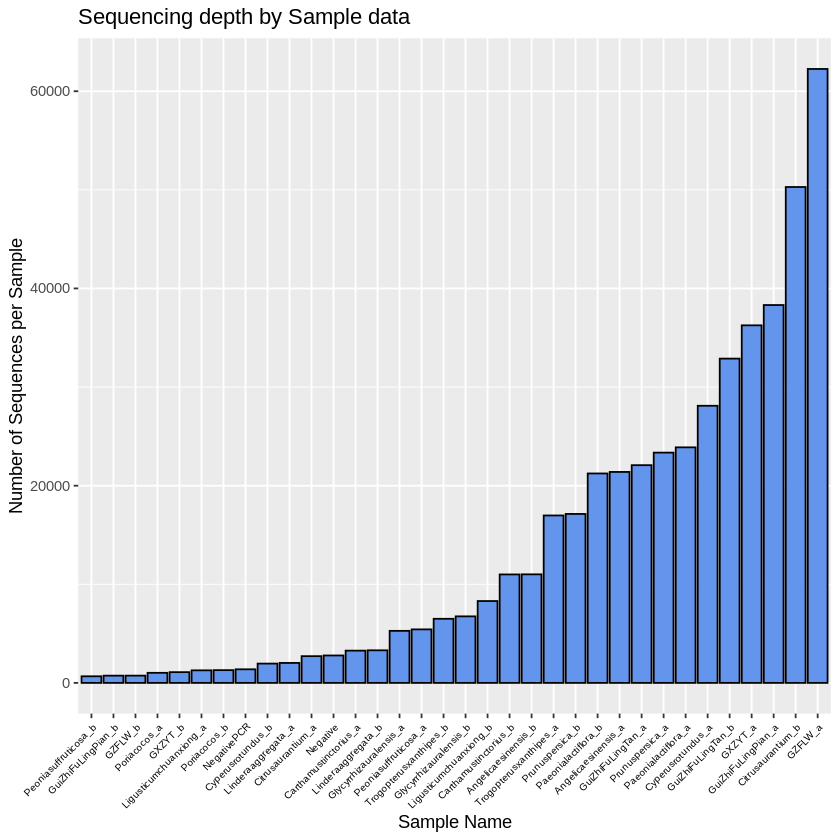

In [50]:
####  Create a plot of the number of sequences per sample
ggplot(sums_all, aes(x=reorder(sample, Sample_TotalSeqs), y = Sample_TotalSeqs)) + 
  ylab("Number of Sequences per Sample") +
  geom_bar(stat = "identity", colour="black",fill="cornflowerblue")  + xlab("Sample Name") + 
  ggtitle("Sequencing depth by Sample data") + 
  theme(axis.text.x = element_text(colour = "black", size=6, angle=45, hjust = 1, vjust = 1))

In [51]:
data_10_cut <- prune_taxa(taxa_sums(data) > 10, data)

In [52]:
data_10_cut

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 103 taxa and 34 samples ]
sample_data() Sample Data:       [ 34 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 103 taxa by 9 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 103 tips and 102 internal nodes ]

In [53]:
data_100_cut <- prune_taxa(taxa_sums(data) > 100, data)

In [54]:
data_100_cut

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 69 taxa and 34 samples ]
sample_data() Sample Data:       [ 34 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 69 taxa by 9 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 69 tips and 68 internal nodes ]

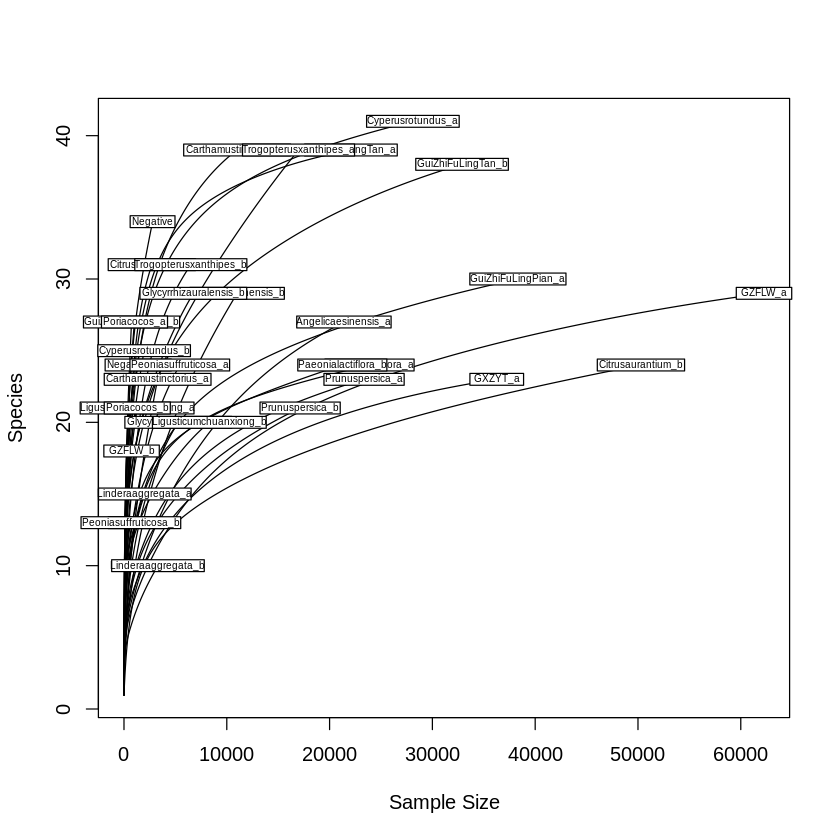

In [55]:
#RARECURVE
rarecurve(t(otu_table(data)), step=50, cex=0.5)

In [56]:
taxonomy[1:5,1:9]

,Kingdom,Phylum,Class,Ord,Family,Genus,Species,SIM,OTU_abundance
ac90db76fbae68003ec939d36b9847a46cbfa3c7,Eukaryota,Streptophyta,Magnoliopsida,Sapindales,Rutaceae,Citrus,micrantha,100.000,51129
2987db85c9fae5a1464f814e070b7507621e8a57,Eukaryota,Streptophyta,Magnoliopsida,Poales,Poaceae,Zea,mays,100.000,43673
addff39eca064dd9caa294721e6a23cab9c331ab,Eukaryota,Streptophyta,Magnoliopsida,Apiales,Apiaceae,Selinum,carvifolia,100.000,41429
a069993ab97b3f720cf66567bfb1fad838b20dc6,Eukaryota,Streptophyta,Magnoliopsida,Laurales,Lauraceae,Cinnamomum,camphora,100.000,37670
28bf85082548d49c8d3b2793064a2fae0f417562,Eukaryota,Streptophyta,Magnoliopsida,Rosales,Rosaceae,Prunus,sunhangii,100.000,34741


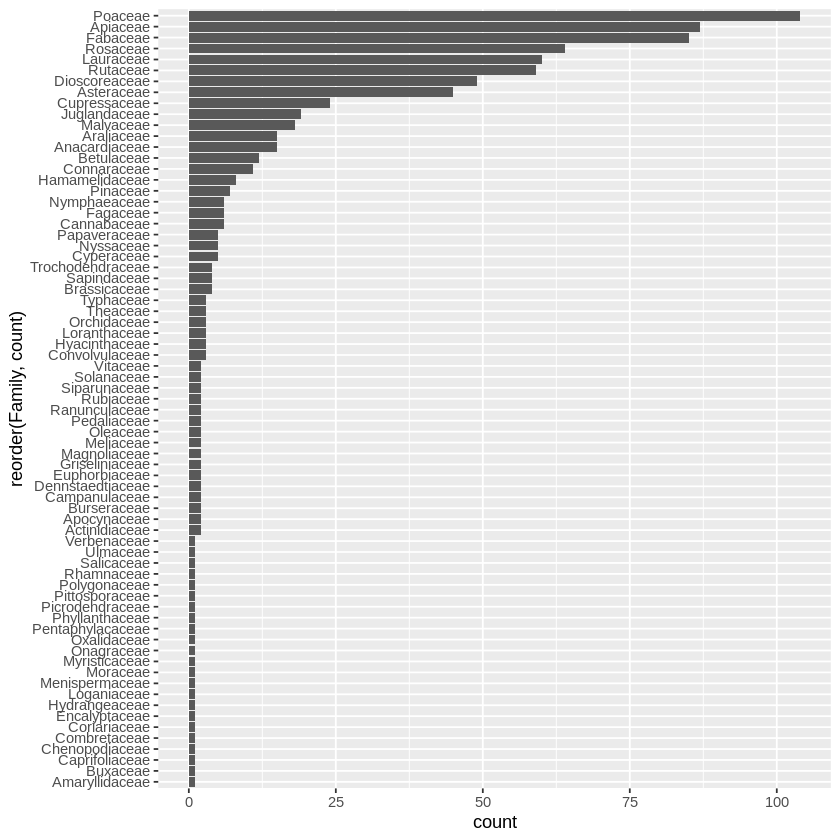

In [57]:
as.data.frame(taxonomy) %>%
  group_by(Family) %>%
  dplyr::count(name = 'count') %>%
  arrange(desc(count)) %>% 
  na.omit() %>%
  ggplot(aes(x=reorder(Family, count), y=count)) + 
  geom_bar(stat = 'identity') + 
  coord_flip()

Only families with more than 5 representative OTUs:

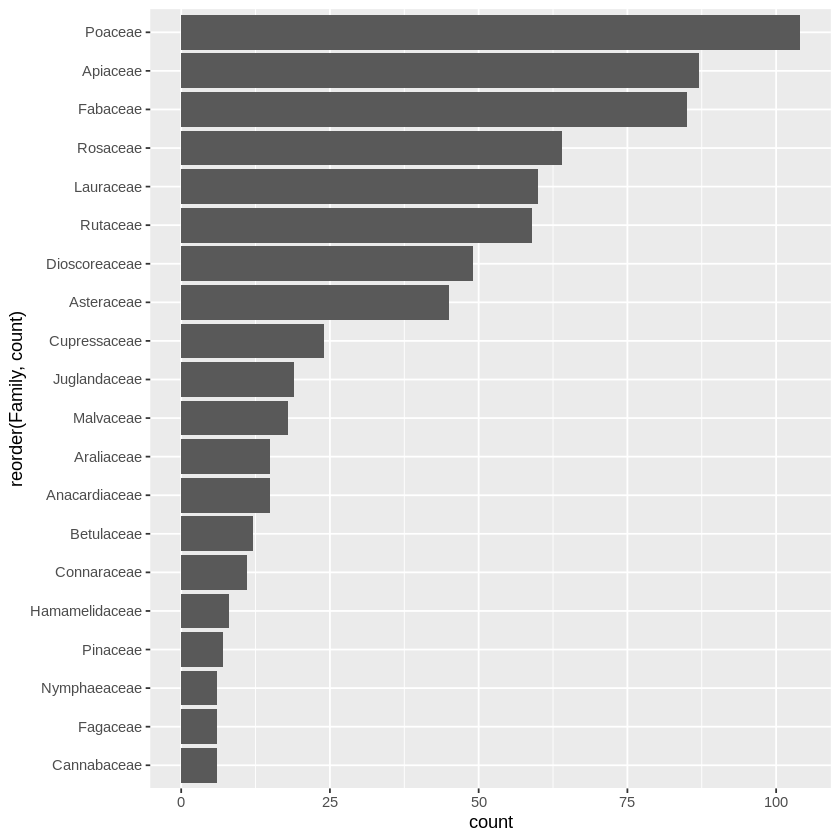

In [58]:
as.data.frame(taxonomy) %>%
  group_by(Family) %>%
  dplyr::count(name = 'count') %>%
  filter(count > 5) %>%
  arrange(desc(count)) %>% 
  na.omit() %>%
  ggplot(aes(x=reorder(Family, count), y=count)) + 
  geom_bar(stat = 'identity') + 
  coord_flip()

In [59]:
#BARPLOT RELATIVO
data_rel <- data %>%
  tax_glom(taxrank = "Family") %>%                     
  transform_sample_counts(function(x) {x/sum(x)} ) %>% 
  psmelt() %>%                                         
  filter(Abundance > 0.05) %>%                         
  arrange(Replicate)

Tem como fazer uma funçãozinha pra essas 2 linhas?

In [60]:
colourCount = 21

In [61]:
getPalette = colorRampPalette(brewer.pal(12, "Paired"))

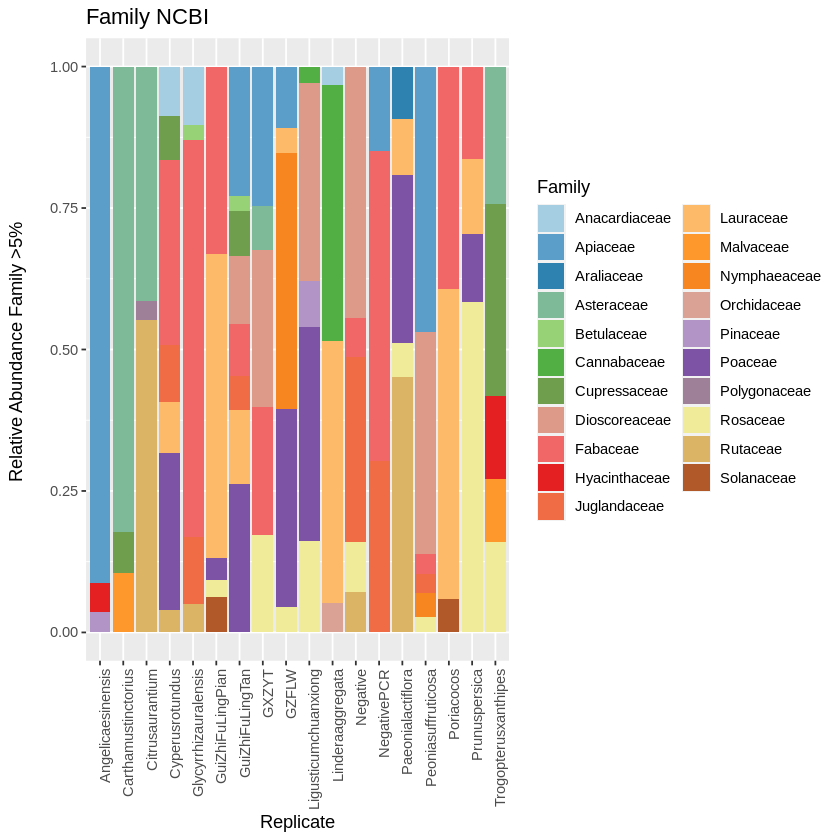

In [62]:
ggplot(data_rel, aes(x = Replicate, y = Abundance, fill = Family)) + 
  geom_bar(position="fill", stat="identity") +
  scale_fill_manual(values = getPalette(colourCount)) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  ylab("Relative Abundance Family >5% \n") +
  ggtitle("Family NCBI")

Observe the negatives!!!

In [63]:
#NEGATIVES AND CONTROLS
data_neg <- subset_samples(data, Replicate == "Negative")
data_neg <- prune_taxa(taxa_sums(data_neg) > 0, data_neg)

In [64]:
data_neg

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 34 taxa and 1 samples ]
sample_data() Sample Data:       [ 1 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 34 taxa by 9 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 34 tips and 33 internal nodes ]

In [65]:
data_negPCR <- subset_samples(data, Replicate == "NegativePCR")
data_negPCR <- prune_taxa(taxa_sums(data_negPCR) > 0, data_negPCR)

In [66]:
data_negPCR

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 24 taxa and 1 samples ]
sample_data() Sample Data:       [ 1 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 24 taxa by 9 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 24 tips and 23 internal nodes ]

Check the composition of negative controls:

In [67]:
data_neg_fam <- data_neg %>%
  tax_glom(taxrank = "Family") %>%                     
  psmelt() %>%                                         
  arrange(Family)

In [68]:
colourCount = 15

In [69]:
getPalette = colorRampPalette(brewer.pal(12, "Paired"))

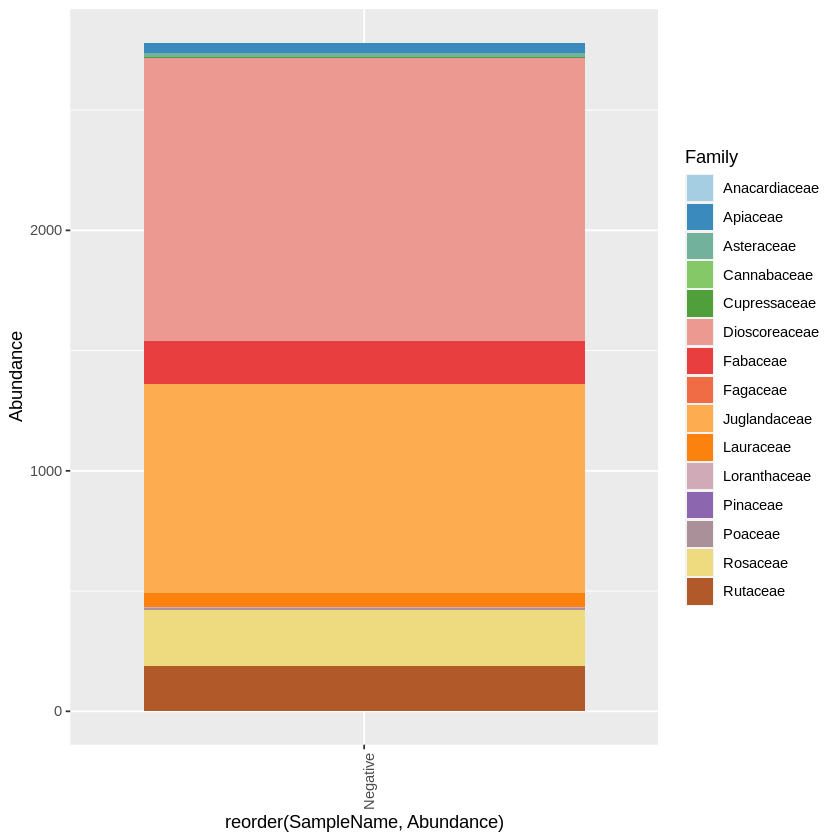

In [70]:
ggplot(data_neg_fam, aes(x = reorder(SampleName, Abundance), y = Abundance, fill = Family)) + 
  geom_bar(stat = "identity") +
  scale_fill_manual(values = getPalette(colourCount)) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) 

Go back to metapipe-run Notebook, and let's see the Dioscoreaceae family in the target95_trnL_OTU_tax_assignments.txt using grep.

instalei o pacote png, mas ele não aceita os png que achei no google...

In [10]:
img = readPNG("dioscorea.png")
img

ERROR: Error in readPNG("dioscorea.png"): file is not in PNG format


In [71]:
data_negPCR_fam <- data_negPCR %>%
  tax_glom(taxrank = "Family") %>%                     
  psmelt() %>%                                         
  arrange(Family)

In [72]:
colourCount = 17

In [73]:
getPalette = colorRampPalette(brewer.pal(12, "Paired"))

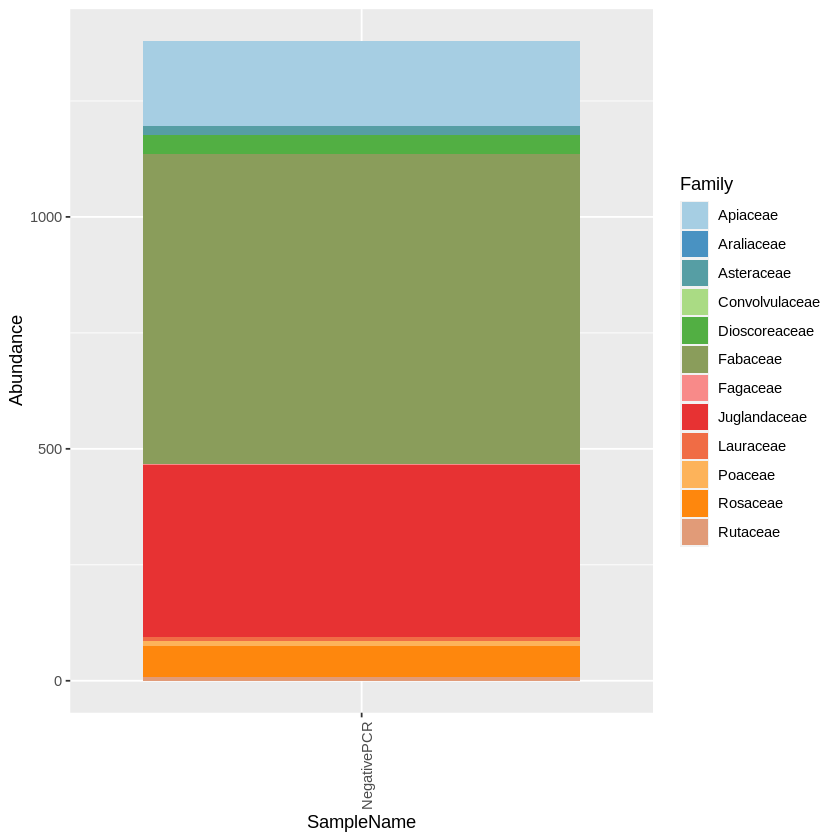

In [74]:
ggplot(data_negPCR_fam, aes(x = SampleName, y = Abundance, fill = Family)) + 
  geom_bar(stat = "identity") +
  scale_fill_manual(values = getPalette(colourCount)) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) 

Let's remove the OTU's amplified in the negative controls:

In [75]:
neg_OTU <- data.frame(taxa_names(data_neg))

In [76]:
count(neg_OTU) #qual o jeito certo desse count?

n
<int>
34


There are 34 OTU's amplified in the negative controls

In [77]:
neg_OTU[1:5,]

[1] "7bb64ef2725b146c74add357867e20995ecd52ee"
[2] "53f1a868d655675aee7efe3fb847216dd3e044ce"
[3] "967e951648145482fcc47f85b2a3530bec26d552"
[4] "ed6401d11df800b43b8ebb9cd6e20ba663ada626"
[5] "0e01321dbbfa720e727118e2bc8ef985fd74875d"

In [78]:
negPCR_OTU <- data.frame(taxa_names(data_negPCR))

In [79]:
count(negPCR_OTU)

n
<int>
24


There are 24 OTU's amplified in the negative PCR controls

In [80]:
negPCR_OTU[1:5,]

[1] "7bb64ef2725b146c74add357867e20995ecd52ee"
[2] "967e951648145482fcc47f85b2a3530bec26d552"
[3] "0e01321dbbfa720e727118e2bc8ef985fd74875d"
[4] "1ad23561fdff8989fd2e4e9a3735a4b8f5633fba"
[5] "14008f9b66320e95d28618b1dc6fc01bd777e86c"

In [81]:
neg_OTU <- as.list(data.frame(taxa_names(data_neg))[,1])

In [82]:
negPCR_OTU <- as.list(data.frame(taxa_names(data_negPCR))[,1])

In [83]:
negPCR_OTU[1:5]

[[1]]
[1] "7bb64ef2725b146c74add357867e20995ecd52ee"

[[2]]
[1] "967e951648145482fcc47f85b2a3530bec26d552"

[[3]]
[1] "0e01321dbbfa720e727118e2bc8ef985fd74875d"

[[4]]
[1] "1ad23561fdff8989fd2e4e9a3735a4b8f5633fba"

[[5]]
[1] "14008f9b66320e95d28618b1dc6fc01bd777e86c"

Tem como fazer uma função pra essas 5 linhas?

In [84]:
allTaxa = taxa_names(data)

In [85]:
allTaxa <- allTaxa[!(allTaxa %in% neg_OTU)]

In [86]:
allTaxa <- allTaxa[!(allTaxa %in% negPCR_OTU)]

In [87]:
data_clean <- prune_taxa(allTaxa, data)

In [88]:
data_clean <- prune_samples(names(which(sample_sums(data_clean) > 1)), data_clean)

In [89]:
data

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 150 taxa and 34 samples ]
sample_data() Sample Data:       [ 34 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 150 taxa by 9 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 150 tips and 149 internal nodes ]

In [90]:
data_clean 

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 110 taxa and 32 samples ]
sample_data() Sample Data:       [ 32 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 110 taxa by 9 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 110 tips and 109 internal nodes ]

58 OTUs amplified in the negative controls were removed, and 110 taxa remained. Let's check our composition again:

In [91]:
#BARPLOT RELATIVO
data_clean_rel <- data_clean %>%
  tax_glom(taxrank = "Family") %>%                     
  transform_sample_counts(function(x) {x/sum(x)} ) %>% 
  psmelt() %>%                                         
  filter(Abundance > 0.05) %>%                         
  arrange(Replicate)

In [95]:
colourCount = 30

In [96]:
getPalette = colorRampPalette(brewer.pal(12, "Paired"))

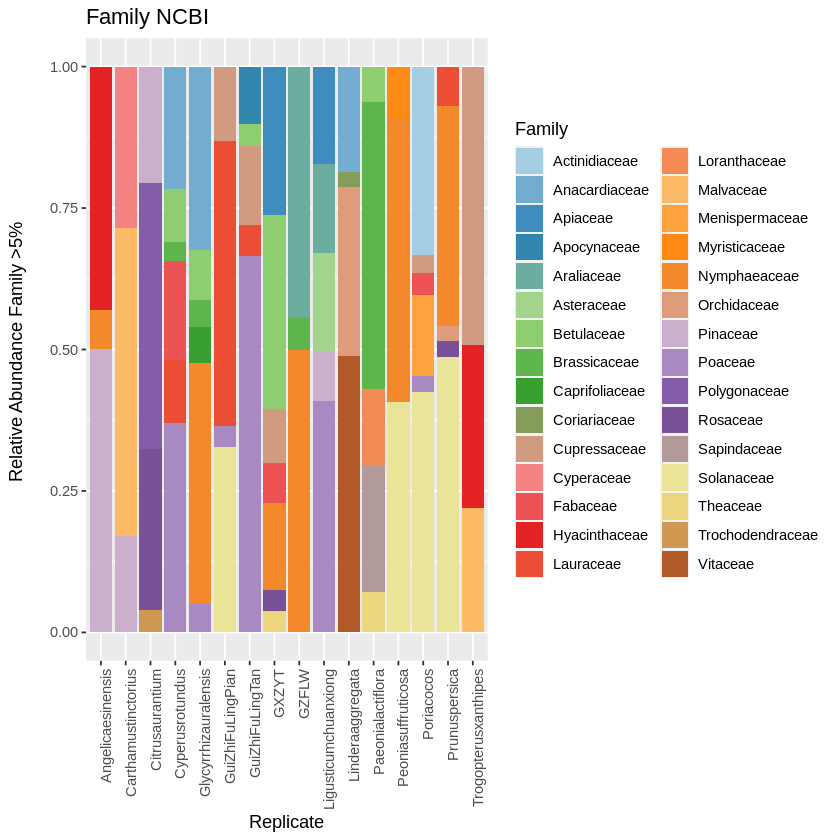

In [97]:
ggplot(data_clean_rel, aes(x = Replicate, y = Abundance, fill = Family)) + 
  geom_bar(position="fill", stat="identity") +
  scale_fill_manual(values = getPalette(colourCount)) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  ylab("Relative Abundance Family >5% \n") +
  ggtitle("Family NCBI")

Observe that the negative control samples were automatically removed.

Interestingly, removing the OTUs amplified in the negative controls increased the number of Families with reads abundance above 5%, from 21 to 30!

Não entendo pq ele mostra as 288 amostras se nesse dataset só tem 197

sample_variables(data) ab_sets fazer vetor para usar no facet_wrap(~ab_sets , dir="v")  +

Let's compare the most abundant OTU's before and after removing the OTUs amplified in the negative controls:

In [105]:
#Top100 OTUs from whole dataset
####################
topN <- 100

In [106]:
most_abundant_taxa = sort(taxa_sums(data), TRUE)[1:topN]

In [107]:
top <- prune_taxa(names(most_abundant_taxa), data)

In [108]:
top_OTUs <- data.frame(taxa_sums(top))

In [109]:
colnames(top_OTUs) <- "Sample_TotalSeqs"

In [110]:
top_OTUs$sample <- row.names(top_OTUs)

In [111]:
top_OTUs <- arrange(top_OTUs, Sample_TotalSeqs)

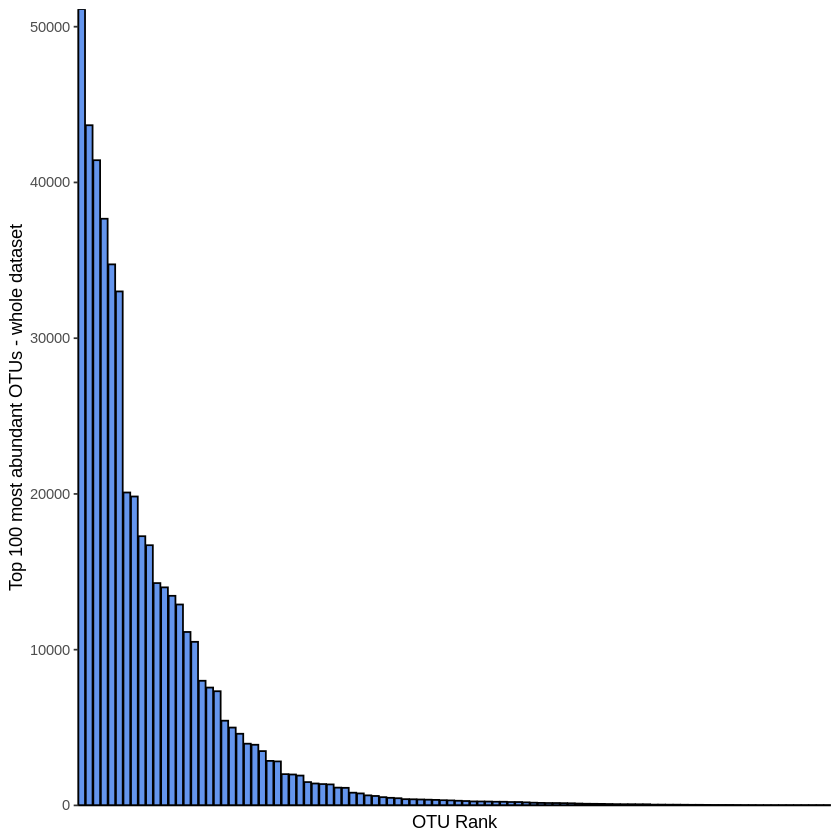

In [112]:
ggplot(top_OTUs,aes(x=reorder(sample, -Sample_TotalSeqs), y = Sample_TotalSeqs)) + 
  geom_bar(stat="identity",colour="black",fill="cornflowerblue")  +
  xlab("OTU Rank") + ylab("Top 100 most abundant OTUs - whole dataset") +
  scale_x_discrete(expand = c(0,0)) + 
  scale_y_continuous(expand = c(0,0)) + theme_classic() +
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank())

We can see that the abundance of the first 6 OTUs are very high, let's check the proportion of the dataset's reads grouped in these 6 OTUs:

In [115]:
topN <- 6

In [116]:
most_abundant_taxa = sort(taxa_sums(data), TRUE)[1:topN]

In [117]:
top_6 <- prune_taxa(names(most_abundant_taxa), data)

In [118]:
top_6_OTUs <- data.frame(taxa_sums(top_6))

In [119]:
colnames(top_6_OTUs) <- "Sample_TotalSeqs"

In [120]:
top_6_OTUs$sample <- row.names(top_6_OTUs)

In [121]:
top_6_OTUs <- arrange(top_6_OTUs, Sample_TotalSeqs)

In [122]:
sum(top_6_OTUs$Sample_TotalSeqs)

[1] 241645

In [123]:
sum(sample_sums(data))

[1] 472695

In [124]:
(241645*100)/472695

[1] 51.1207

In [147]:
top_6_OTUs

,Sample_TotalSeqs,sample
,<dbl>,<chr>
967e951648145482fcc47f85b2a3530bec26d552,33003,967e951648145482fcc47f85b2a3530bec26d552
28bf85082548d49c8d3b2793064a2fae0f417562,34741,28bf85082548d49c8d3b2793064a2fae0f417562
a069993ab97b3f720cf66567bfb1fad838b20dc6,37670,a069993ab97b3f720cf66567bfb1fad838b20dc6
addff39eca064dd9caa294721e6a23cab9c331ab,41429,addff39eca064dd9caa294721e6a23cab9c331ab
2987db85c9fae5a1464f814e070b7507621e8a57,43673,2987db85c9fae5a1464f814e070b7507621e8a57
ac90db76fbae68003ec939d36b9847a46cbfa3c7,51129,ac90db76fbae68003ec939d36b9847a46cbfa3c7


Over 50% of total reads abundance was clustered in the 6 top OTUs.

Now let's plot the same with the data_clean dataset

In [126]:
topN <- 100

In [127]:
most_abundant_taxa = sort(taxa_sums(data_clean), TRUE)[1:topN]

In [128]:
top <- prune_taxa(names(most_abundant_taxa), data_clean)

In [129]:
top_OTUs <- data.frame(taxa_sums(top))

In [130]:
colnames(top_OTUs) <- "Sample_TotalSeqs"

In [131]:
top_OTUs$sample <- row.names(top_OTUs)

In [132]:
top_OTUs <- arrange(top_OTUs, Sample_TotalSeqs)

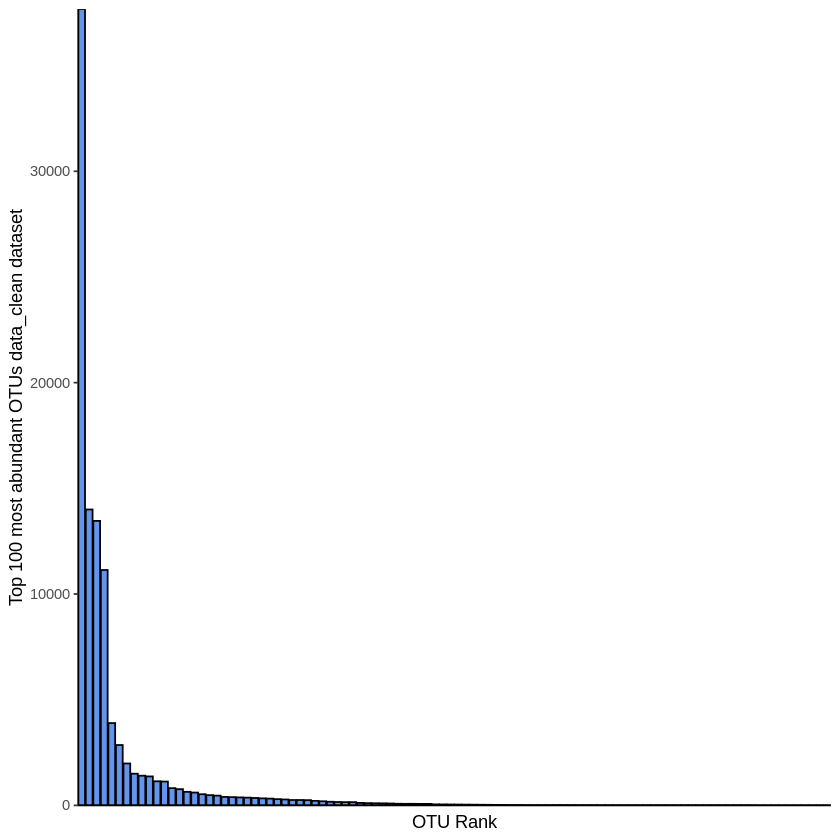

In [133]:
ggplot(top_OTUs,aes(x=reorder(sample, -Sample_TotalSeqs), y = Sample_TotalSeqs)) + 
  geom_bar(stat="identity",colour="black",fill="cornflowerblue")  +
  xlab("OTU Rank") + ylab("Top 100 most abundant OTUs data_clean dataset") +
  scale_x_discrete(expand = c(0,0)) + 
  scale_y_continuous(expand = c(0,0)) + theme_classic() +
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank())

Now we have a much different abundance curve, lets check who are these 4 top abundance otus:

In [134]:
topN <- 4

In [135]:
most_abundant_taxa = sort(taxa_sums(data_clean), TRUE)[1:topN]

In [136]:
top_4 <- prune_taxa(names(most_abundant_taxa), data_clean)

In [137]:
top_4_OTUs <- data.frame(taxa_sums(top_4))

In [138]:
colnames(top_4_OTUs) <- "Sample_TotalSeqs"

In [139]:
top_4_OTUs$sample <- row.names(top_4_OTUs)

In [140]:
top_4_OTUs <- arrange(top_4_OTUs, Sample_TotalSeqs)

In [141]:
sum(top_4_OTUs$Sample_TotalSeqs)

[1] 76264

In [142]:
sum(sample_sums(data_clean))

[1] 102470

In [143]:
(76264*100)/102470

[1] 74.42569

In [144]:
top_4_OTUs

,Sample_TotalSeqs,sample
,<dbl>,<chr>
9319dccb21d181d5ff01c4d084ace1f2bf1d9f87,11136,9319dccb21d181d5ff01c4d084ace1f2bf1d9f87
d9e0449e3f64c10837e21c2f3fb744969044482d,13459,d9e0449e3f64c10837e21c2f3fb744969044482d
785131f35679fb33afaedf6919f8ec30539638bc,13999,785131f35679fb33afaedf6919f8ec30539638bc
a069993ab97b3f720cf66567bfb1fad838b20dc6,37670,a069993ab97b3f720cf66567bfb1fad838b20dc6


The top 4 OTUs represent over 74% of the data_clean dataset's reads abundance.

<p>Go to <strong>metapipe-run</strong> Notebook and type:</p>
<p>!grep &quot;9319dccb21d181d5ff01c4d084ace1f2bf1d9f87&quot; target95_trnL_OTU_tax_assignments.txt</p>
<p>!grep &quot;d9e0449e3f64c10837e21c2f3fb744969044482d&quot; target95_trnL_OTU_tax_assignments.txt</p>
<p>!grep &quot;785131f35679fb33afaedf6919f8ec30539638bc&quot; target95_trnL_OTU_tax_assignments.txt</p>
<p>!grep &quot;a069993ab97b3f720cf66567bfb1fad838b20dc6&quot; target95_trnL_OTU_tax_assignments.txt</p></p>

<p>The Top1 OTU is a Streptophyta|Magnoliopsida|Laurales|Lauraceae|Cinnamomum camphora sim=100.000</p>
<p>The Top2 OTU is a Streptophyta|Pinopsida|NA|Cupressaceae|Thuja sp. sim=100.000</p>
<p>The Top3 OTU is a Streptophyta|Magnoliopsida|Poales|Poaceae|Campeiostachys calcicola sim=100.000</p>
<p>The Top4 OTU is a Streptophyta|Magnoliopsida|Poales|Poaceae|Campeiostachys calcicola sim=100.000</p>

Let's check again the composition barplot:

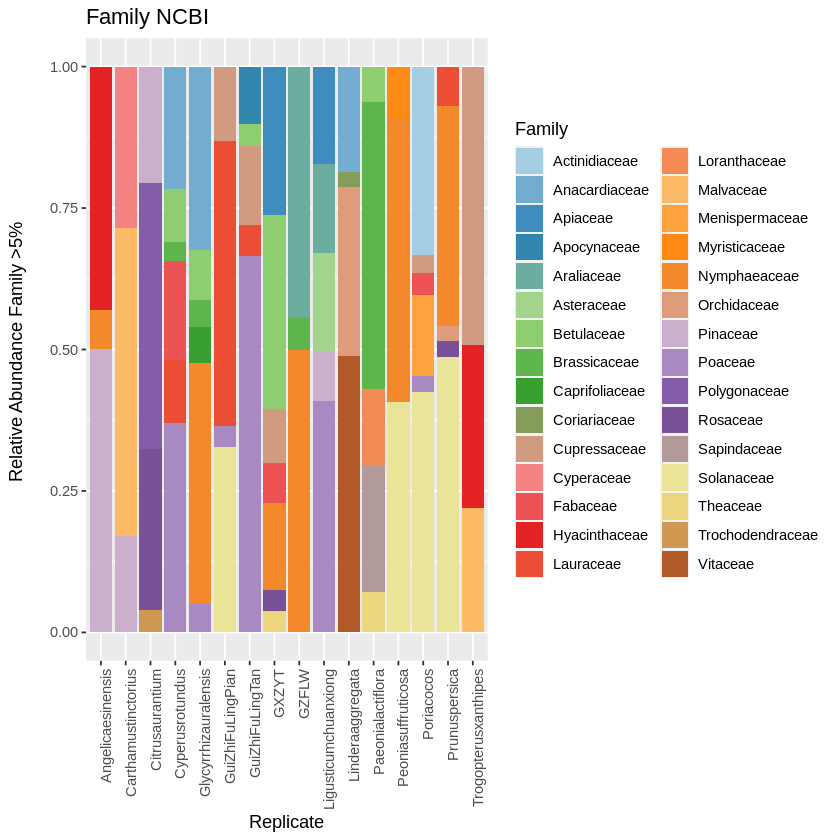

In [148]:
ggplot(data_clean_rel, aes(x = Replicate, y = Abundance, fill = Family)) + 
  geom_bar(position="fill", stat="identity") +
  scale_fill_manual(values = getPalette(colourCount)) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  ylab("Relative Abundance Family >5% \n") +
  ggtitle("Family NCBI")

In [145]:
metadata

,SampleName,Replicate,Experiment,Exp_fam,Exp_genus
,<chr>,<chr>,<chr>,<chr>,<chr>
Angelicaesinensis_a,Angelicaesinensis_a,Angelicaesinensis,Exp1,Apiaceae,Angelica
Angelicaesinensis_b,Angelicaesinensis_b,Angelicaesinensis,Exp1,Apiaceae,Angelica
Carthamustinctorius_a,Carthamustinctorius_a,Carthamustinctorius,Exp2,Asteraceae,Carthamus
Carthamustinctorius_b,Carthamustinctorius_b,Carthamustinctorius,Exp2,Asteraceae,Carthamus
Citrusaurantium_a,Citrusaurantium_a,Citrusaurantium,Exp3,Rutaceae,Citrus
Citrusaurantium_b,Citrusaurantium_b,Citrusaurantium,Exp3,Rutaceae,Citrus
Cyperusrotundus_a,Cyperusrotundus_a,Cyperusrotundus,Exp4,Cypereae,Cyperus
Cyperusrotundus_b,Cyperusrotundus_b,Cyperusrotundus,Exp4,Cypereae,Cyperus
Glycyrrhizauralensis_a,Glycyrrhizauralensis_a,Glycyrrhizauralensis,Exp5,Fabaceae,Glycyrrhiza


Now let's explore the dataset's metadata. There are 16 experimental units, each one with a "expected" composition.

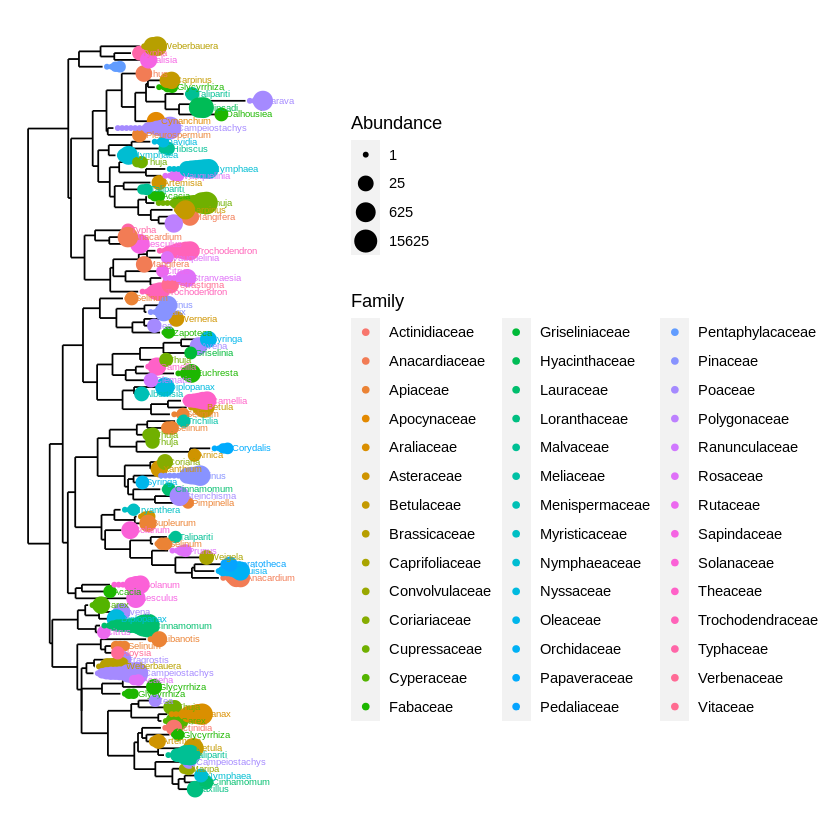

In [146]:
plot_tree(data_clean, color="Family", size="Abundance", label.tips = "Genus")